# Chapter 3 - a binary classification example

In [1]:
from keras.datasets import imdb
from keras import models, layers
from keras import regularizers
from keras import optimizers
from keras import losses
from keras import metrics
import numpy as np

import matplotlib.pyplot as plt

## Loading dataset

In [2]:
# Suggested code - doesn't work
# (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

### Workaround to load dataset:
https://stackoverflow.com/a/56243777


In [3]:

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

### Example of decoding a review back to English

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]   
)
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [5]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Preparing data

In [6]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


## Model definition

In [8]:
model = models.Sequential()
model.add(
    layers.Dense(
        16, 
        activation='relu', 
        kernel_regularizer=regularizers.l2(0.001),
        input_shape=(10000,)))
model.add(
    layers.Dense(
        16, 
        kernel_regularizer=regularizers.l2(0.001),
        activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy]
)

W0430 18:00:45.705165 4562580928 deprecation_wrapper.py:119] From /Users/adriano.gil/.virtualenvs/pydeep/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0430 18:00:45.728965 4562580928 deprecation_wrapper.py:119] From /Users/adriano.gil/.virtualenvs/pydeep/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0430 18:00:45.731341 4562580928 deprecation_wrapper.py:119] From /Users/adriano.gil/.virtualenvs/pydeep/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0430 18:00:45.789008 4562580928 deprecation_wrapper.py:119] From /Users/adriano.gil/.virtualenvs/pydeep/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.

## Creating a validation set

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Training model

In [10]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

W0430 18:00:46.102106 4562580928 deprecation_wrapper.py:119] From /Users/adriano.gil/.virtualenvs/pydeep/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 225us/step - loss: 0.5515 - binary_accuracy: 0.7812 - val_loss: 0.4255 - val_binary_accuracy: 0.8667
Epoch 2/20
15000/15000 [==============================] - 2s 149us/step - loss: 0.3541 - binary_accuracy: 0.9037 - val_loss: 0.3517 - val_binary_accuracy: 0.8892
Epoch 3/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.2833 - binary_accuracy: 0.9229 - val_loss: 0.3677 - val_binary_accuracy: 0.8698
Epoch 4/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.2519 - binary_accuracy: 0.9359 - val_loss: 0.3335 - val_binary_accuracy: 0.8878
Epoch 5/20
15000/15000 [=====================

## Plotting the training and validation loss

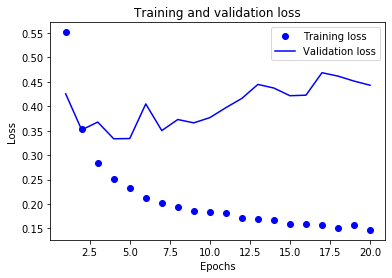

In [11]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Plotting the training and validation accuracy

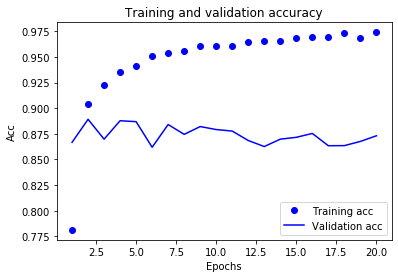

In [12]:
plt.clf()

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

## Retraining model from scratch

In [13]:
odel = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy]
)
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 102us/step - loss: 0.6919 - binary_accuracy: 0.8498
Epoch 2/4
25000/25000 [==============================] - 2s 89us/step - loss: 0.6383 - binary_accuracy: 0.8822
Epoch 3/4
25000/25000 [==============================] - 2s 90us/step - loss: 0.5771 - binary_accuracy: 0.8982
Epoch 4/4
25000/25000 [==============================] - 3s 121us/step


In [14]:
results

[0.506100952796936, 0.87236]

In [15]:
model.predict(x_test)

array([[0.39205167],
       [0.7865046 ],
       [0.55192864],
       ...,
       [0.39041778],
       [0.3897398 ],
       [0.43993407]], dtype=float32)